In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [35]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
print(breast_cancer.variables) 


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [36]:
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [37]:
for i in X.columns:
    print (X[i].value_counts())

age
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: count, dtype: int64
menopause
premeno    150
ge40       129
lt40         7
Name: count, dtype: int64
tumor-size
30-34     60
25-29     54
20-24     50
15-19     30
14-Oct    28
40-44     22
35-39     19
0-4        8
50-54      8
9-May      4
45-49      3
Name: count, dtype: int64
inv-nodes
0-2       213
5-Mar      36
8-Jun      17
11-Sep     10
15-17       6
14-Dec      3
24-26       1
Name: count, dtype: int64
node-caps
no     222
yes     56
Name: count, dtype: int64
deg-malig
2    130
3     85
1     71
Name: count, dtype: int64
breast
left     152
right    134
Name: count, dtype: int64
breast-quad
left_low     110
left_up       97
right_up      33
right_low     24
central       21
Name: count, dtype: int64
irradiat
no     218
yes     68
Name: count, dtype: int64


In [38]:
encoder = LabelEncoder()
for columns in X.columns:
    X[columns] = encoder.fit_transform(X[columns].astype(str))

C:\Users\Shrinidhi.V\AppData\Local\Temp\ipykernel_3440\1375336796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns] = encoder.fit_transform(X[columns].astype(str))
C:\Users\Shrinidhi.V\AppData\Local\Temp\ipykernel_3440\1375336796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns] = encoder.fit_transform(X[columns].astype(str))
C:\Users\Shrinidhi.V\AppData\Local\Temp\ipykernel_3440\1375336796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [43]:
for i in X.columns:
    print (X[i].value_counts())

age
3    96
2    90
4    57
1    36
5     6
0     1
Name: count, dtype: int64
menopause
2    150
0    129
1      7
Name: count, dtype: int64
tumor-size
5     60
4     54
3     50
2     30
1     28
7     22
6     19
0      8
9      8
10     4
8      3
Name: count, dtype: int64
inv-nodes
0    213
5     36
6     17
1     10
3      6
2      3
4      1
Name: count, dtype: int64
node-caps
1    222
2     56
0      8
Name: count, dtype: int64
deg-malig
1    130
2     85
0     71
Name: count, dtype: int64
breast
0    152
1    134
Name: count, dtype: int64
breast-quad
1    110
2     97
5     33
4     24
0     21
3      1
Name: count, dtype: int64
irradiat
0    218
1     68
Name: count, dtype: int64


In [45]:
y["Class"].value_counts()

Class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64

In [47]:
y["Class"] = encoder.fit_transform(y["Class"].astype(str))

C:\Users\Shrinidhi.V\AppData\Local\Temp\ipykernel_3440\299697608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Class"] = encoder.fit_transform(y["Class"].astype(str))


In [49]:
y["Class"].value_counts()

Class
0    201
1     85
Name: count, dtype: int64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 100)

Accuracy Score =  0.7068965517241379
Recall Score =  0.17647058823529413
F1 Score =  0.2608695652173913
Precision Score =  0.5


C:\Users\Shrinidhi.V\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


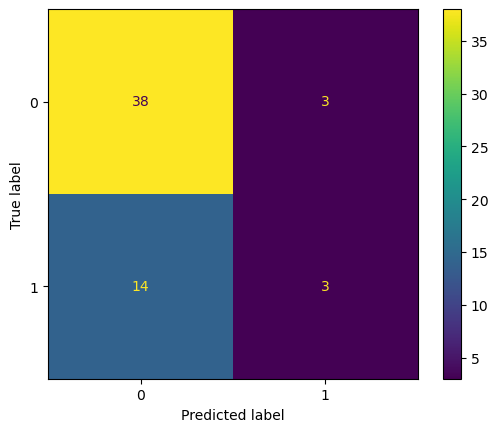

In [57]:
lr = LogisticRegression(random_state = 100)
log_model = lr.fit(x_train, y_train)
log_pred = lr.predict(x_test)

print('Accuracy Score = ', metrics.accuracy_score(y_test,log_pred))
print('Recall Score = ', metrics.recall_score(y_test,log_pred))
print('F1 Score = ', metrics.f1_score(y_test,log_pred))
print('Precision Score = ', metrics.precision_score(y_test,log_pred))

cm = metrics.confusion_matrix(y_test, log_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = log_model.classes_)
Display.plot()

Accuracy Score =  0.6206896551724138
Recall Score =  0.47058823529411764
F1 Score =  0.42105263157894735
Precision Score =  0.38095238095238093


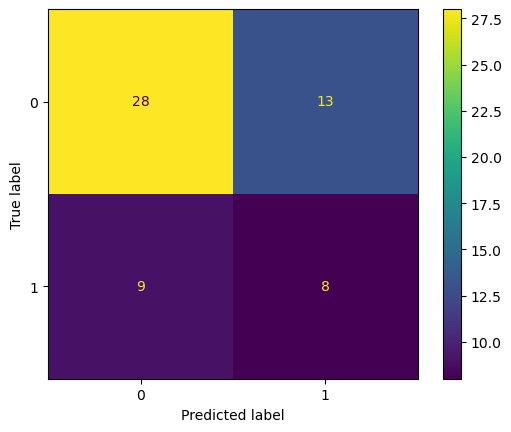

In [59]:
dt = DecisionTreeClassifier(random_state = 42)
dt_model = dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

print('Accuracy Score = ', metrics.accuracy_score(y_test,dt_pred))
print('Recall Score = ', metrics.recall_score(y_test,dt_pred))
print('F1 Score = ', metrics.f1_score(y_test,dt_pred))
print('Precision Score = ', metrics.precision_score(y_test,dt_pred))

cm = metrics.confusion_matrix(y_test,dt_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = dt_model.classes_)
Display.plot()

C:\Users\Shrinidhi.V\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shrinidhi.V\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shrinidhi.V\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shrinidhi.V\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Accuracy Score =  0.7241379310344828
Recall Score =  0.47058823529411764
F1 Score =  0.5
Precision Score =  0.5333333333333333


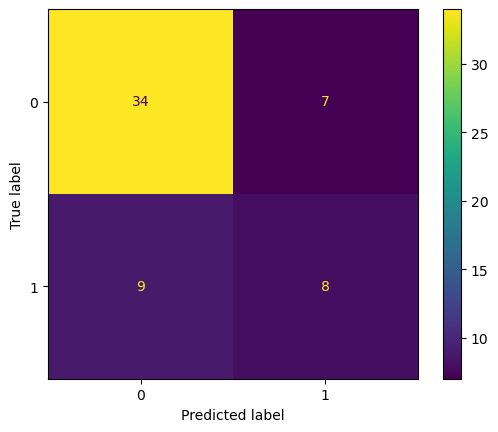

In [71]:
RFC = RandomForestClassifier(criterion = "entropy", random_state = 61)
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}
clf = GridSearchCV(RFC, cv_params, cv = 5, refit = "precision")
clf.fit(x_train,y_train)
rfc_pred = clf.best_estimator_.predict(x_test)

print('Accuracy Score = ', metrics.accuracy_score(y_test,rfc_pred))
print('Recall Score = ', metrics.recall_score(y_test,rfc_pred))
print('F1 Score = ', metrics.f1_score(y_test,rfc_pred))
print('Precision Score = ', metrics.precision_score(y_test,rfc_pred))

cm = metrics.confusion_matrix(y_test, rfc_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = rfc_model.classes_)
Display.plot()

Accuracy Score =  0.5689655172413793
Recall Score =  0.35294117647058826
F1 Score =  0.32432432432432434
Precision Score =  0.3


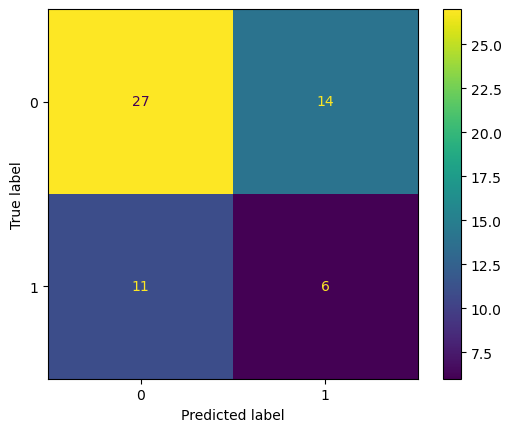

In [63]:
XGB = XGBClassifier()
xgb_model = XGB.fit(x_train, y_train)
xgb_pred = XGB.predict(x_test)

print('Accuracy Score = ', metrics.accuracy_score(y_test,xgb_pred))
print('Recall Score = ', metrics.recall_score(y_test,xgb_pred))
print('F1 Score = ', metrics.f1_score(y_test,xgb_pred))
print('Precision Score = ', metrics.precision_score(y_test,xgb_pred))

cm = metrics.confusion_matrix(y_test, xgb_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = xgb_model.classes_)
Display.plot()